### Student Information
Name: Ching Yun, Hsu

Student ID: 108061586

GitHub ID: kris265x

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

---

## First Part :  Take Home Exercises

In [ ]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [55]:
# Library

from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

### Exercise 2

In [3]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


#Answer here

X.info(verbose=True)
#X.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category       2257 non-null   int64 
 2   category_name  2257 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.0+ KB


### Exercise 5

In [4]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here

As we can see above, there are a total of two columns : 'id' and 'missing_example'.
We will discuss each id and their correspoding missing example in order below:

id: A<br>
The missing example is np.nan. If we run the code pd.isnull(np.nan), and will return True which matches the result we see above from `.isnull()` function.

id: B<br>
The missing example and the corresponding value are both missing, so it should be no suprise that `.isnull()` retursn True.

id: C<br> 
The missing example is 'NaN', which is considered a string. So `.isnull()` returns False as there was no missing value.

id: D<br> 
The missing example is 'None', which is considered a string. So `.isnull()` returns False as there was no missing value.

id: E<br> 
The missing example is None, which is different from the missing example for D. The missing example None here is not considered as a string but something meaningful in python. None keyword is used to define a null value, or no value at all. So `.isnull()` should return False as above.

id: F<br> 
Even though the missing example is '', which basically contains nothing, but the quotes still make it to be considered as a string in python. So `.isnull()` returns False with no surprise

In [6]:
# id: A
pd.isnull(np.nan)

True

### Exercise 6

In [8]:
X_sample = X.sample(n=1000) #random state
X_sample.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1375 to 792
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           1000 non-null   object
 1   category       1000 non-null   int64 
 2   category_name  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.2+ KB


### Answer here
There are no any significant changes after sampling, except for the fact that it randomly samples from the dataset, so it does not display the text number in order.

### Exercise 8

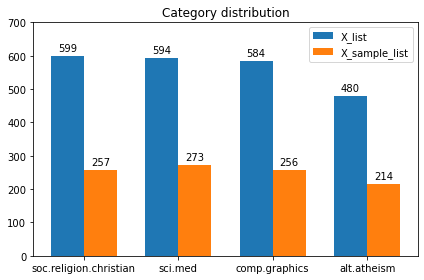

In [10]:
# Answer here

categories = ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']

# create the dataset and the sample dataset
X_list = []
X_list.append(X.category.value_counts())
X_sample_list = []
X_sample_list.append(X_sample.category.value_counts())

X_list = np.reshape(X_list, (-1))
X_sample_list = np.reshape(X_sample_list, (-1))

X_sample_list[0], X_sample_list[1] = X_sample_list[1], X_sample_list[0]
#print(X_list)
#print(X_sample_list)

# the label locations
x = np.arange(len(categories))

# the width of the bars
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, X_list, width, label='X_list')
rects2 = ax.bar(x + width/2, X_sample_list, width, label='X_sample_list')

# Add title and x-axis tick labels.
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_ylim(0, 700)
ax.set_xticklabels(categories)
ax.legend()

# plot
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        #upper_bound = max(X_sample.category_name.value_counts()) + 10
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Exercise 10

In [12]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Answer here

X_array = X_counts[0:5, 0:100].toarray()

count = 0
ans = 0
for i in X_array[4,]:
    if (i == 1) and (count != 0):
        ans = count
    count += 1
    
count_vect.get_feature_names()[ans:ans+1]

['01']

### Exercise 11

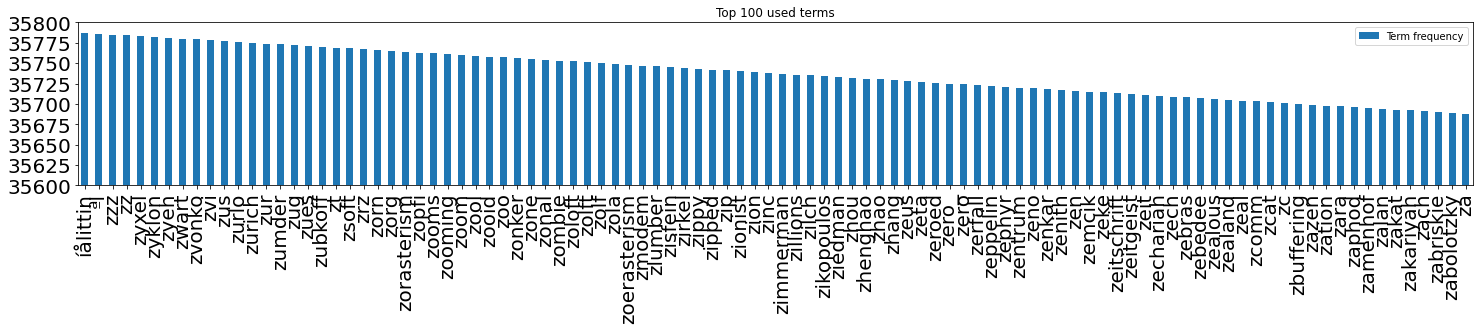

In [67]:
# Answer here

count = CountVectorizer(ngram_range=(1, 1))
count.fit(X.text)
BoW = count.vocabulary_

word = []
freq = []
for key in sorted(list(BoW.keys()),key = lambda i:BoW[i], reverse=True)[:100]:     
    word.append(key)
    freq.append(BoW[key])
    
# plot the most used 100 terms    
df = pd.DataFrame(freq, columns = ["Term frequency"], index = word)
ax = df.plot.bar(title = 'Top 100 used terms', ylim = [35600, 35800]
                 , fontsize = 20, figsize = (25,3))

### Exercise 12

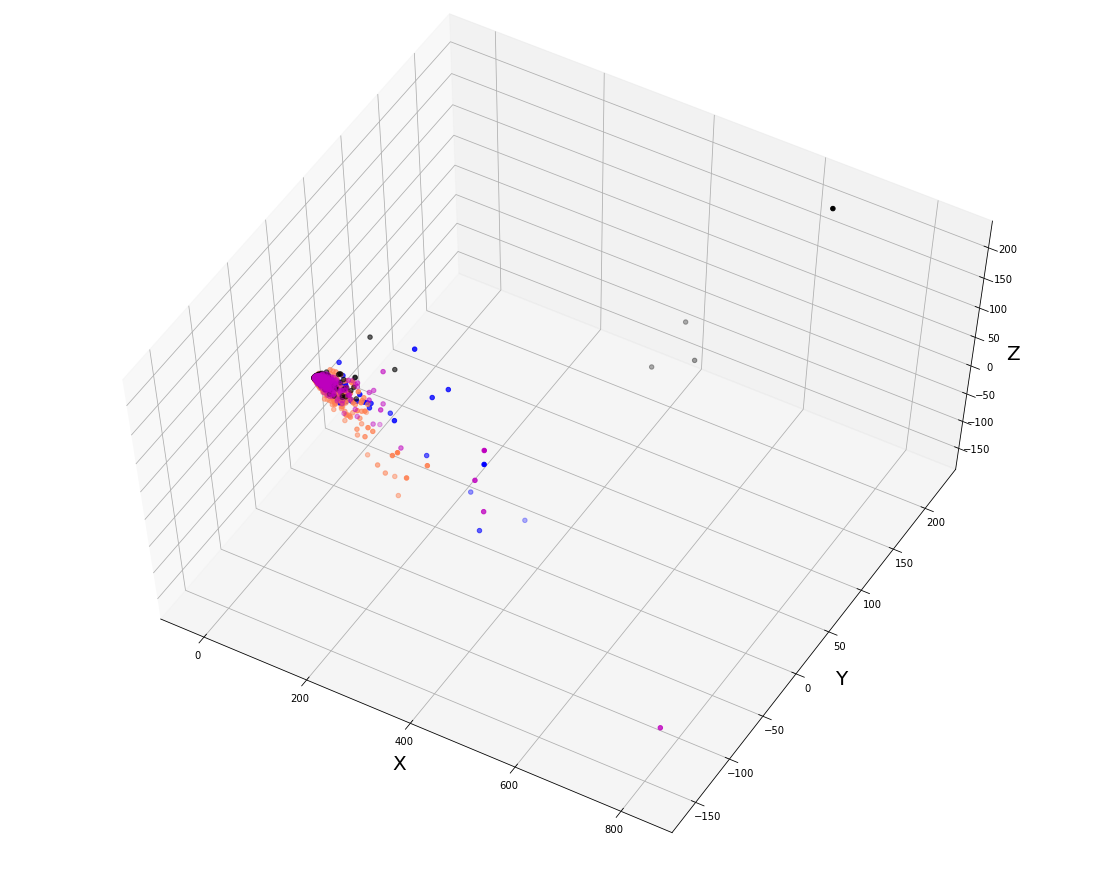

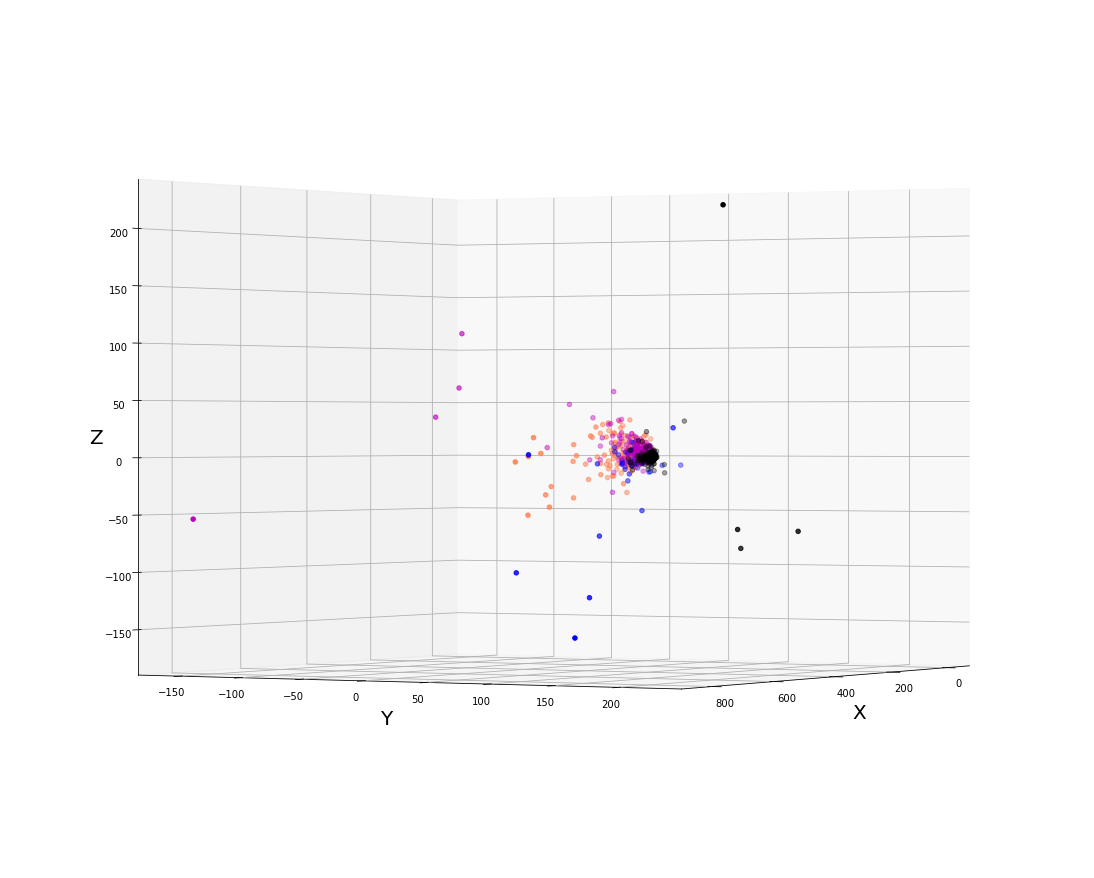

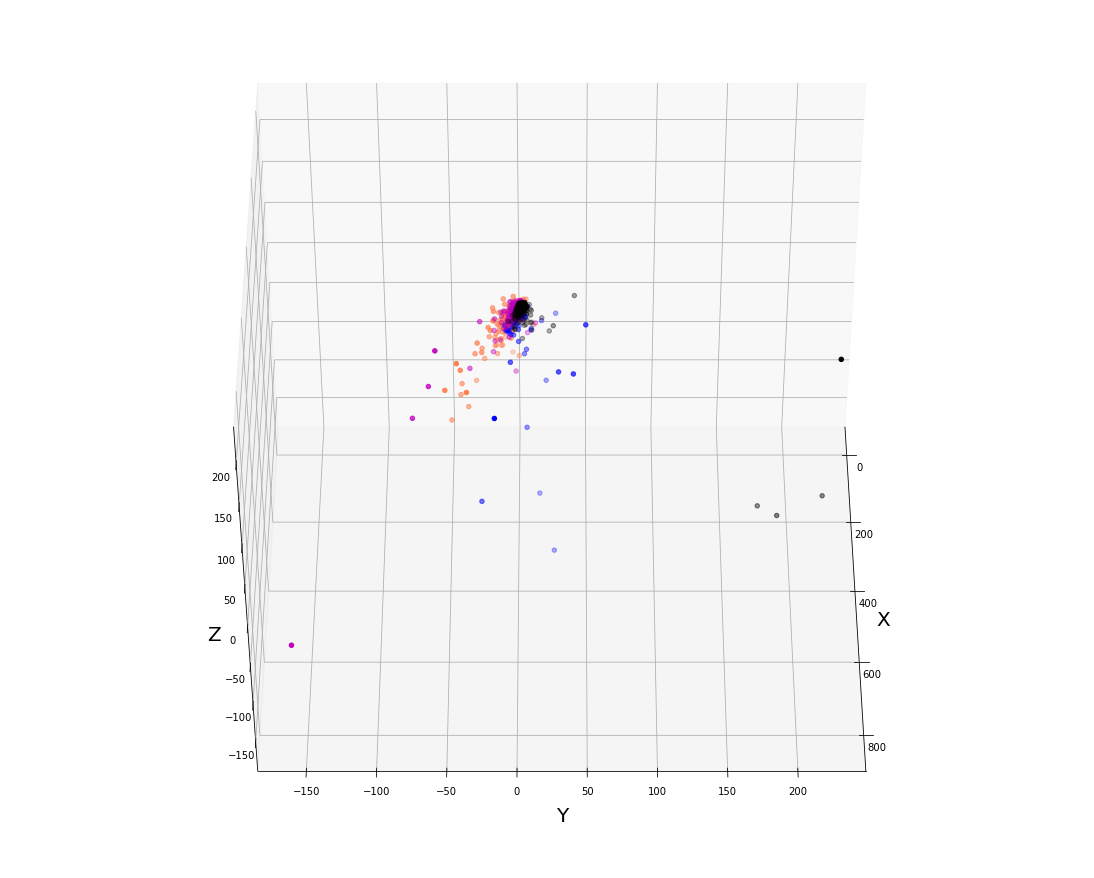

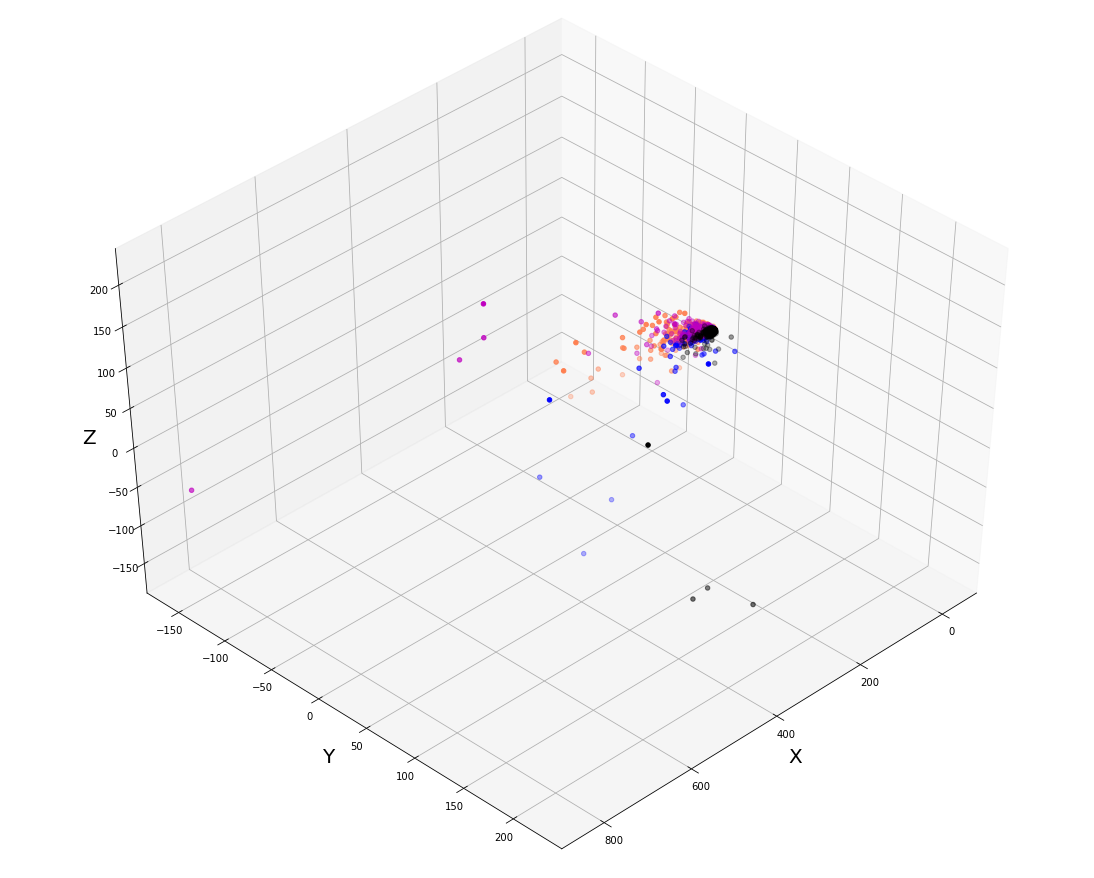

In [17]:
# Answer here

X_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

def plot_3D(elev, azim):

    fig = plt.figure(figsize = (15,12))
    ax = Axes3D(fig)

    for c, category in zip(col, categories):
        xs = X_3D[X['category_name'] == category].T[0]
        ys = X_3D[X['category_name'] == category].T[1]
        zs = X_3D[X['category_name'] == category].T[2]  
        ax.scatter(xs, ys, zs, c = c, marker='o')
        ax.view_init(elev=elev,azim=azim)

    ax.set_zlabel('\nZ', fontdict={'size': 20, 'color': 'black'})
    ax.set_ylabel('\nY', fontdict={'size': 20, 'color': 'black'})
    ax.set_xlabel('\nX', fontdict={'size': 20, 'color': 'black'})

    plt.show()


plot_3D(60, -60)
plot_3D(0, 30)
plot_3D(45, 0)
plot_3D(45, 45)

### Exercise 13

In [26]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Answer here

freq_list = term_frequencies[:300].tolist()
word = count_vect.get_feature_names()[:300]
count = freq_list

df = pd.DataFrame({'word':word, 'count':count})
#print(df)
#print(df['count'])

fig = px.bar(df, x='word', y='count')
fig.update_layout(xaxis_type='category')

fig.show()

### Exercise 14

In [28]:
#len(term_frequencies) #35788

In [30]:
# Answer here

# select the count frequency that is greater than 1000
name = []
freq = []
for i in range(0,X_counts.shape[1]):
    if sum(X_counts[:,i].toarray()) > 1000:
        name.append(count_vect.get_feature_names()[i])
        freq.append(sum(X_counts[:,i].toarray()))
    
fig = px.line(x=name, y=[list(i)[0] for i in freq], labels={'x':'word', 'y':'count > 1000'})
fig.show()

### Exercise 15

In [31]:
match = [(a,b[0]) for (a,b) in zip(name, freq)]
match = sorted(match, key = lambda i:i[1], reverse = True)

# Answer here
sort_name = [word for (word,_) in match]
sort_freq = [frequency for (_,frequency) in match]

fig = px.line(x=sort_name, y=sort_freq, labels={'x':'word', 'y':'count > 1000'})
fig.show()

### Exercise 16

In [52]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:10]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 0, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 0, 0]"


In [69]:
# check if one or more elements are non-zero
for i in X['bin_category_name']:
    if X['bin_category_name'][i].any(): 
        pass
        #print("No")

#### Answer

No, binarization on  `category_name` does not work.

---

## Second Part : The New Dataset

### Data Source and Data Preparation

In [203]:
import os 
import numpy as np

DATASET_PATH = 'sentiment labelled sentences'

amazon = []
yelp = []
imdb = []

for subject in os.listdir(DATASET_PATH):
    path = DATASET_PATH + "/" + subject
    
    if "amazon" in subject:
        file = open(path,"r")
        al=file.read()
        for each in al.split("\n"):
            amazon.append(each.split("\t"))
        file.close()  

    elif "yelp" in subject:
        file = open(path,"r")
        al=file.read()
        for each in al.split("\n"):
            yelp.append(each.split("\t"))
        file.close()  
        
    elif "imdb" in subject:
        file = open(path,"r")
        al=file.read()
        for each in al.split("\n"):
            imdb.append(each.split("\t"))
        file.close()

In [204]:
#len(amazon)
amazon = amazon[:1000]
yelp = yelp[:1000]
imdb = imdb[:1000]

In [205]:
print(len(amazon))
print(len(yelp))
print(len(imdb))

1000
1000
1000


In [206]:
amazon[:10]

[['So there is no way for me to plug it in here in the US unless I go by a converter.',
  '0'],
 ['Good case, Excellent value.', '1'],
 ['Great for the jawbone.', '1'],
 ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
  '0'],
 ['The mic is great.', '1'],
 ['I have to jiggle the plug to get it to line up right to get decent volume.',
  '0'],
 ['If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
  '0'],
 ['If you are Razr owner...you must have this!', '1'],
 ['Needless to say, I wasted my money.', '0'],
 ['What a waste of money and time!.', '0']]

In [207]:
yelp[:10]

[['Wow... Loved this place.', '1'],
 ['Crust is not good.', '0'],
 ['Not tasty and the texture was just nasty.', '0'],
 ['Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
  '1'],
 ['The selection on the menu was great and so were the prices.', '1'],
 ['Now I am getting angry and I want my damn pho.', '0'],
 ["Honeslty it didn't taste THAT fresh.)", '0'],
 ['The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
  '0'],
 ['The fries were great too.', '1'],
 ['A great touch.', '1']]

In [208]:
imdb[:10]

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  '0'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  '0'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  '0'],
 ['Very little music or anything to speak of.  ', '0'],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  '1'],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  '0'],
 ['Wasted two hours.  ', '0'],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  '1'],
 ['A bit predictable.  ', '0'],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', '1']]

---

### Data Transformation

In [209]:
import pandas as pd

df_amazon = pd.DataFrame(amazon, columns= ['sentence','score'])
df_yelp = pd.DataFrame(yelp, columns= ['sentence','score'])
df_imdb = pd.DataFrame(imdb, columns= ['sentence','score'])

# merge the data from amazon, yelp, and imdb together
frames = [df_amazon, df_yelp, df_imdb]
df = pd.concat(frames)

In [210]:
df

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


#### add columns

In [211]:
df['sentiment'] = df.score.apply(lambda t: 'Positive' if t=='1' else 'Negative')

In [212]:
df[0:10]

,sentence,score,sentiment
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive
5,I have to jiggle the plug to get it to line up...,0,Negative
6,If you have several dozen or several hundred c...,0,Negative
7,If you are Razr owner...you must have this!,1,Positive
8,"Needless to say, I wasted my money.",0,Negative
9,What a waste of money and time!.,0,Negative


#### Quiry

In [213]:
df[0:10][['sentence', 'sentiment']]

,sentence,sentiment
0,So there is no way for me to plug it in here i...,Negative
1,"Good case, Excellent value.",Positive
2,Great for the jawbone.,Positive
3,Tied to charger for conversations lasting more...,Negative
4,The mic is great.,Positive
5,I have to jiggle the plug to get it to line up...,Negative
6,If you have several dozen or several hundred c...,Negative
7,If you are Razr owner...you must have this!,Positive
8,"Needless to say, I wasted my money.",Negative
9,What a waste of money and time!.,Negative


In [214]:
df[-10:]

,sentence,score,sentiment
990,"The opening sequence of this gem is a classic,...",1,Positive
991,Fans of the genre will be in heaven.,1,Positive
992,Lange had become a great actress.,1,Positive
993,It looked like a wonderful story.,1,Positive
994,I never walked out of a movie faster.,0,Negative
995,I just got bored watching Jessice Lange take h...,0,Negative
996,"Unfortunately, any virtue in this film's produ...",0,Negative
997,"In a word, it is embarrassing.",0,Negative
998,Exceptionally bad!,0,Negative
999,All in all its an insult to one's intelligence...,0,Negative


In [215]:
# using iloc
df.iloc[::10, 0:2][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [216]:
# using loc
X.loc[::10, 'text'][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

In [217]:
# standard query
df[::10][0:10]

,sentence,score,sentiment
0,So there is no way for me to plug it in here i...,0,Negative
10,And the sound quality is great.,1,Positive
20,I went on Motorola's website and followed all ...,0,Negative
30,"This is a simple little phone to use, but the ...",0,Negative
40,"It has a great camera thats 2MP, and the pics ...",1,Positive
50,Not loud enough and doesn't turn on like it sh...,0,Negative
60,Essentially you can forget Microsoft's tech su...,0,Negative
70,Mic Doesn't work.,0,Negative
80,I wear it everyday and it holds up very well.,1,Positive
90,For a product that costs as much as this one d...,0,Negative


---

### Data Mining using Pandas

#### Missing Value

In [218]:
df.isnull()

,sentence,score,sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [219]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence     (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 0)
dtype: object

In [220]:
dummy_series = pd.Series(["dummy_record", '1'], index=["sentence", "score"])

In [221]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [222]:
result_with_series = df.append(dummy_series, ignore_index=True)

In [223]:
len(result_with_series)

3001

In [224]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence     (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 1)
dtype: object

In [225]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [226]:
df = df.append(dummy_dict, ignore_index=True)

In [227]:
len(df)

3001

In [228]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence     (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 1)
dtype: object

In [229]:
df.dropna(inplace=True)

In [230]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence     (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 0)
dtype: object

In [231]:
len(df)

3000

#### Duplicated data

In [232]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [233]:
sum(df.duplicated())

17

In [234]:
# The same comment sentence would be considered a dulplicate.
sum(df.duplicated('sentence'))

17

In [235]:
# inplace applies changes directly on our dataframe
df.drop_duplicates(keep=False, inplace=True) 

In [236]:
len(df)

2966

In [237]:
sum(df.duplicated('sentence'))

0

---

### Data Preprocessing

#### sampling

In [239]:
df_sample = df.sample(n=1000)

In [241]:
len(df_sample)

1000

In [243]:
df_sample[0:4]

,sentence,score,sentiment
2301,10 out of 10 for both the movie and trilogy.,1,Positive
1697,I was mortified.,0,Negative
1026,- They never brought a salad we asked for.,0,Negative
710,Can't store anything but phone numbers to SIM.,0,Negative


0    1486
1    1480
Name: score, dtype: int64


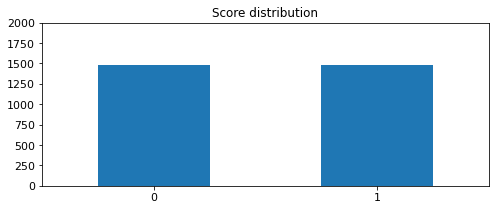

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline

print(df.score.value_counts())

# plot barchart for X_sample
df.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 2000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0    508
1    492
Name: score, dtype: int64


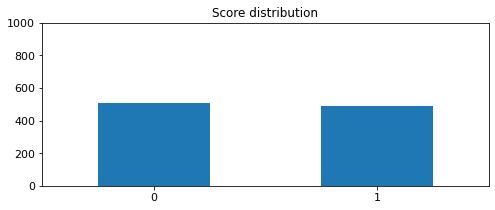

In [250]:
print(df_sample.score.value_counts())

# plot barchart for X_sample
df_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [258]:
X_list = []
X_list.append(df.score.value_counts())
X_sample_list = []
X_sample_list.append(df_sample.score.value_counts())

X_list = np.reshape(X_list, (-1))
X_sample_list = np.reshape(X_sample_list, (-1))

#X_sample_list[0], X_sample_list[1] = X_sample_list[1], X_sample_list[0]
print(X_list)
print(X_sample_list)

[1486 1480]
[508 492]


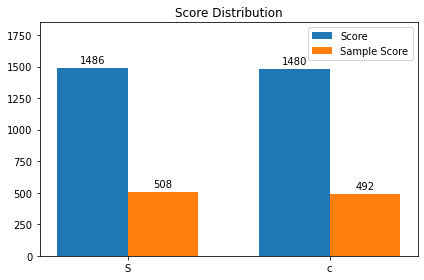

In [259]:
x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, X_list, width, label='Score')
rects2 = ax.bar(x + width/2, X_sample_list, width, label='Sample Score')

# Add title and x-axis tick labels.
ax.set_title('Score Distribution')
ax.set_xticks(x)
ax.set_ylim(0, 1850)
ax.set_xticklabels('Score')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        #upper_bound = max(X_sample.category_name.value_counts()) + 10
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### Feature Creation

In [260]:
import nltk

In [261]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [262]:
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [263]:
df[0:4]

,sentence,score,sentiment,unigrams
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin..."


In [264]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### Feature subset selection

In [265]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

In [266]:
df_counts.shape

(2966, 5153)

In [267]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [268]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [269]:
df[0:5]

,sentence,score,sentiment,unigrams
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Positive,"[The, mic, is, great, .]"


In [270]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [271]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [272]:
count_vect.transform(['00 Something completely new.']).toarray()
#count_vect.transform(['00 00 Something completely new.']).toarray()
#count_vect.transform(['00 Something 00 completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [277]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[1500:1550]]

In [278]:
plot_x

['term_elsewhere',
 'term_email',
 'term_embarassing',
 'term_embarrassed',
 'term_embarrassing',
 'term_embassy',
 'term_embedded',
 'term_emerge',
 'term_emilio',
 'term_emily',
 'term_emoting',
 'term_emotion',
 'term_emotionally',
 'term_emotions',
 'term_emperor',
 'term_employee',
 'term_employees',
 'term_empowerment',
 'term_emptiness',
 'term_empty',
 'term_en',
 'term_enchanting',
 'term_encourage',
 'term_end',
 'term_endearing',
 'term_ended',
 'term_ending',
 'term_endlessly',
 'term_ends',
 'term_energetic',
 'term_energy',
 'term_engaging',
 'term_engineered',
 'term_english',
 'term_enhanced',
 'term_enjoy',
 'term_enjoyable',
 'term_enjoyed',
 'term_enjoyment',
 'term_enough',
 'term_ensued',
 'term_enter',
 'term_enterprise',
 'term_entertained',
 'term_entertaining',
 'term_entertainment',
 'term_enthusiastic',
 'term_entire',
 'term_entirely',
 'term_entrance']

In [280]:
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:50]]

In [284]:
#plot_y

In [286]:
plot_z = df_counts[0:50, 1500:1550].toarray()

In [287]:
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

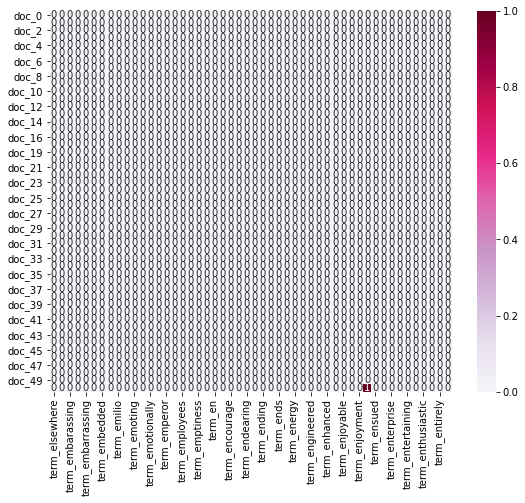

In [288]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Dimensionality Reduction

In [289]:
from sklearn.decomposition import PCA

In [290]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [291]:
df_reduced.shape

(2966, 2)

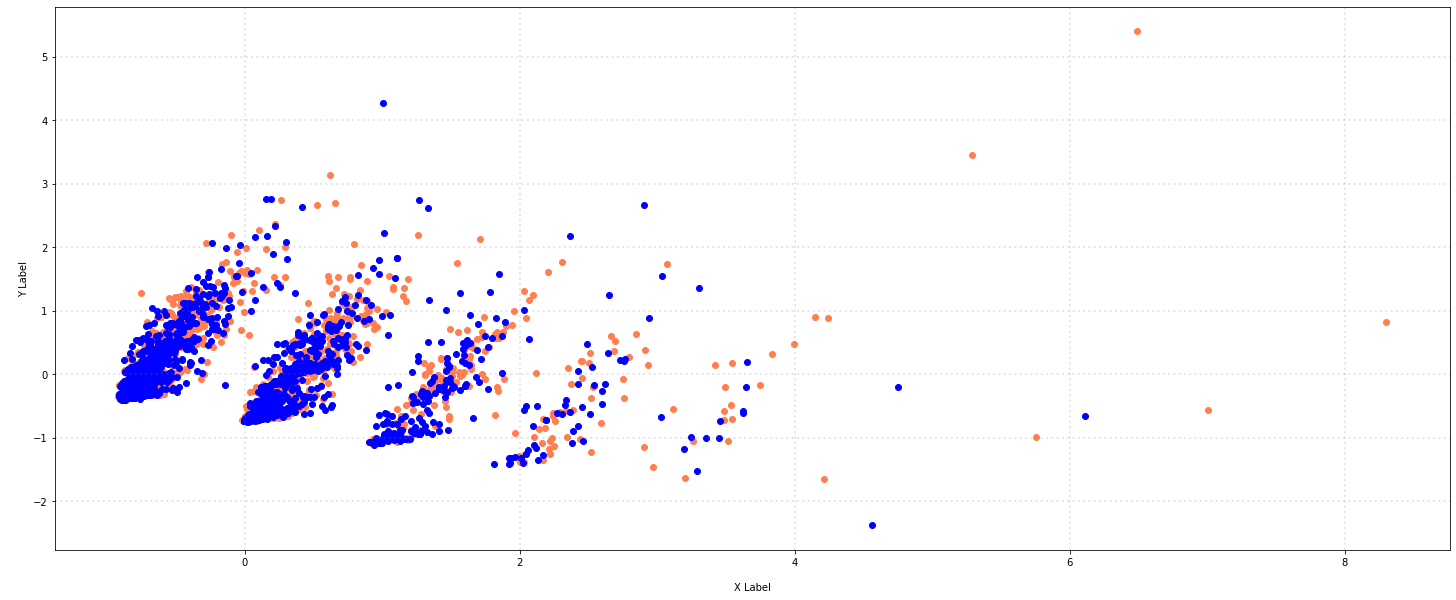

In [298]:
# plot
col = ['coral', 'blue']
sentiments = ['Positive', 'Negative']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, sentiments in zip(col, sentiment):
    xs = df_reduced[df['sentiment'] == sentiments].T[0]
    ys = df_reduced[df['sentiment'] == sentiments].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

#### Attribute Transformation / Aggregration

In [299]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [300]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [301]:
term_frequencies[0]

1

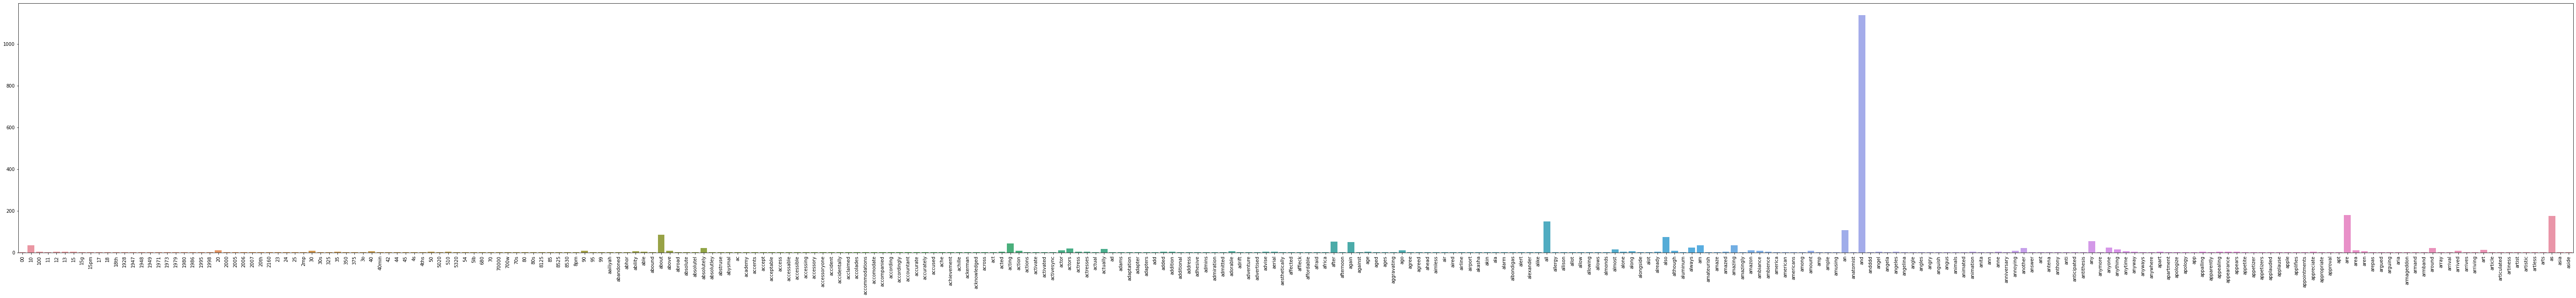

In [302]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [303]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

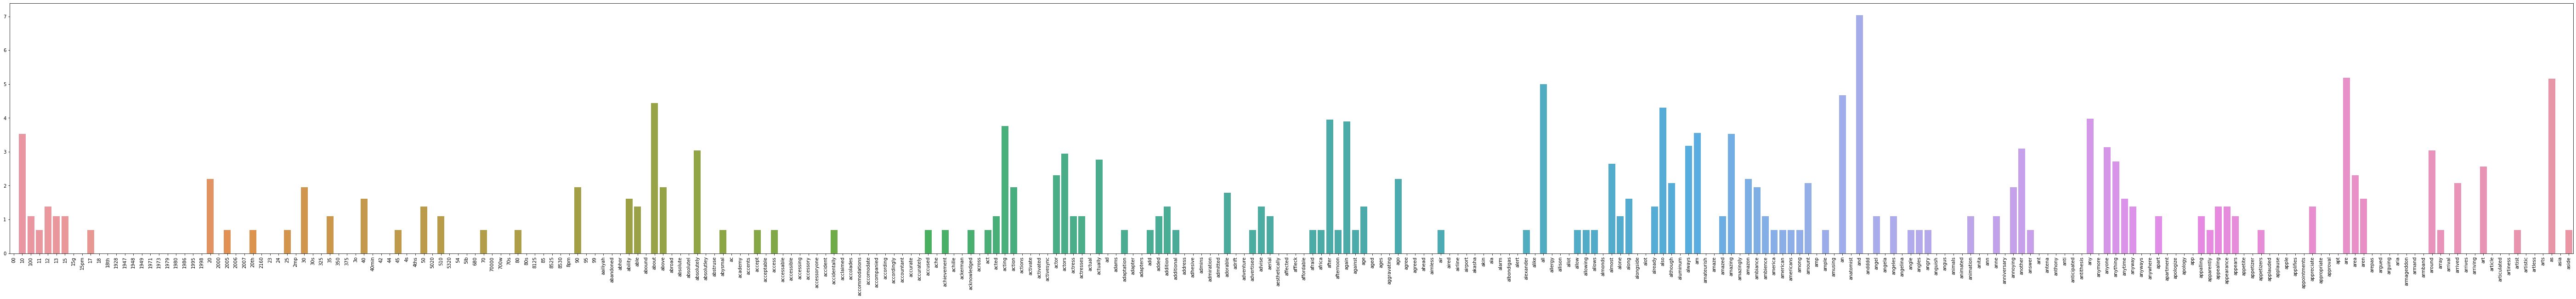

In [304]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

#### Discretization and Binarization

In [305]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [306]:
mlb = preprocessing.LabelBinarizer()

In [308]:
mlb.fit(df.score)

LabelBinarizer()

In [309]:
mlb.classes_

array(['0', '1'], dtype='<U1')

In [312]:
df['bin_score'] = mlb.transform(df['score']).tolist()

In [313]:
df[0:9]

,sentence,score,sentiment,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


---

### Data Exploration

In [314]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [315]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [316]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1)
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
  (0, 216)	1
  (0, 622)	1
  (0, 1343)	1
  (0, 1992)	1
  (0, 2754)	1
  (0, 3062)	1
  (0, 3320)	1
  (0, 3511)	1
  (0, 4627)	1
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [317]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


---

## Third Part

## Fourth Part

## Fifth Part